pip install pandas scikit-learn matplotlib seaborn


In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [3]:
import pandas as pd
import zipfile
import os

# Step 1: Download the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
zip_file_path = "bank_marketing.zip"

# Download the file
import requests
response = requests.get(url)
with open(zip_file_path, 'wb') as file:
    file.write(response.content)

# Step 2: Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("bank_marketing")

# Step 3: Locate the desired CSV file
# In this case, let's assume we're using 'bank-additional-full.csv'
csv_file_path = os.path.join("bank_marketing", "bank-additional", "bank-additional-full.csv")

# Step 4: Load the CSV file
df = pd.read_csv(csv_file_path, delimiter=';')

# Step 5: Display the first few rows
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [4]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical columns to numerical using one-hot encoding (or label encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target (y)
X = df_encoded.drop('y_yes', axis=1)  # 'y_yes' is the target variable for purchase (binary: yes/no)
y = df_encoded['y_yes']  # Target variable: whether the customer will purchase

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8868657441126487

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



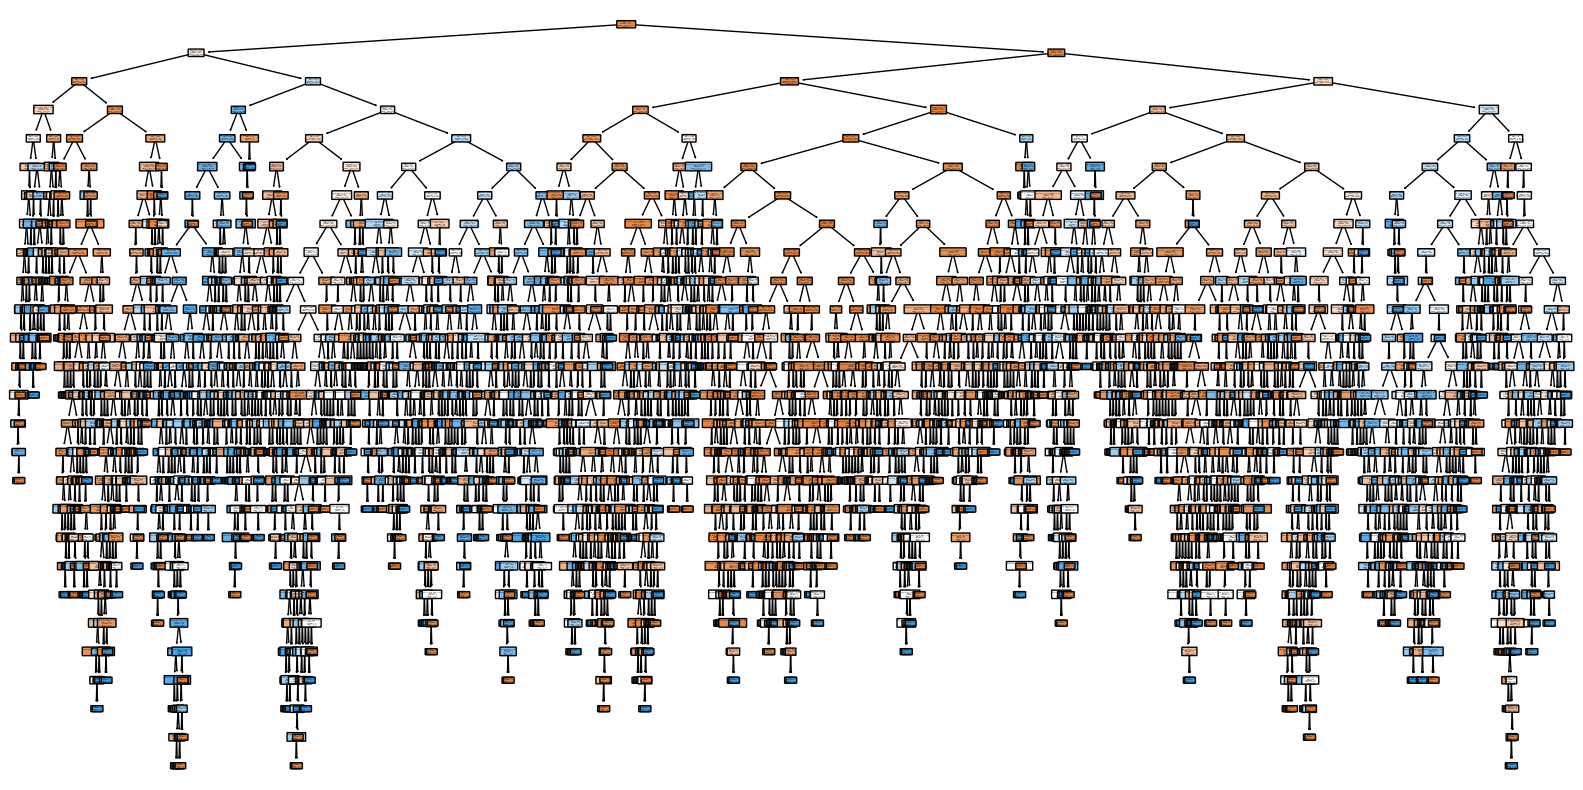

In [6]:
from sklearn.tree import plot_tree

# Plot the trained Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


In [7]:
# Fine-tune the Decision Tree with max_depth and min_samples_leaf
dt_model_tuned = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=10)
dt_model_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = dt_model_tuned.predict(X_test)

# Evaluate the tuned model
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned)}")
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.915270696771061

Tuned Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      7303
        True       0.65      0.54      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238

